In [1]:
# import relevant libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Importing `is_churn.json` and checking the data:

In [2]:
# read `is_churn.json` file and check it
churn_data = pd.read_json('../data/challenge/is_churn.json')
churn_data

customer_code    last_purchase_date  is_churn
0               31  2018-05-23T00:00:00Z         0
1              560  2018-02-21T00:00:00Z         0
2              697  2018-06-12T00:00:00Z         0
3              438  2018-02-26T00:00:00Z         0
4              234  2018-02-08T00:00:00Z         1
..             ...                   ...       ...
813            550  2018-04-12T00:00:00Z         0
814            318  2018-01-31T00:00:00Z         1
815            524  2018-05-08T00:00:00Z         0
816            783  2018-04-15T00:00:00Z         0
817            331  2018-02-27T00:00:00Z         1

[818 rows x 3 columns]

In [3]:
# checking column dtypes
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_code       818 non-null    int64 
 1   last_purchase_date  818 non-null    object
 2   is_churn            818 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 19.3+ KB


### Important!
The above output already hints that no NaN's exist.

___
## Perform column-wise analysis of `churn_data`:

### Column `customer_code`

In [4]:
# check if all `customer_code` are unique
print(f"Shape (rows) of churn_data: {churn_data.shape[0]}")
aux = churn_data.customer_code.nunique()
print(f"Number of unique customers: {aux}")

Shape (rows) of churn_data: 818
Number of unique customers: 818


### Column `last_purchase_date`

In [5]:
# convert `last_purchase_date` to datetime format
churn_data.last_purchase_date = pd.to_datetime(churn_data.last_purchase_date)

In [6]:
# check if all data have their 'time' part as 00:00:00, i.e., time is irrelevant
churn_data.last_purchase_date.dt.time.value_counts()

00:00:00    818
Name: last_purchase_date, dtype: int64

In [7]:
# drop the 'time' part, only keeping the 'date' part
churn_data.last_purchase_date = pd.to_datetime(churn_data.last_purchase_date.dt.date)   # converting to datetime again since .dt.date returns a string

In [8]:
# check when was the last purchase
churn_data.last_purchase_date.max()

Timestamp('2018-07-08 00:00:00')

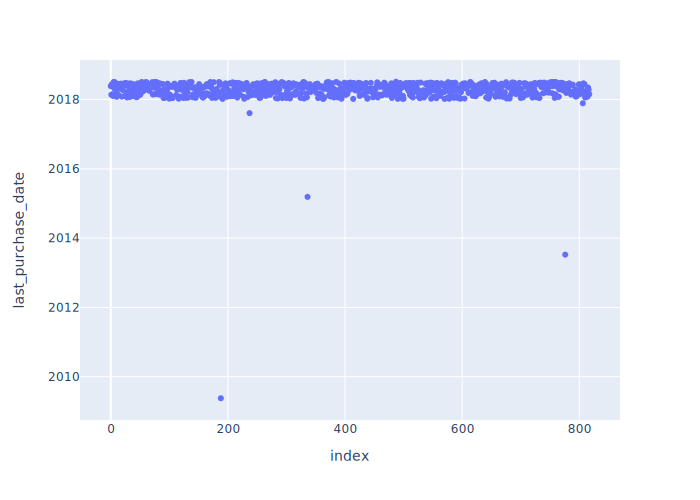

In [9]:
# plot date distribution
fig = px.scatter(data_frame=churn_data, y='last_purchase_date')
fig.show('svg')

Since most values are from 2018, I will delete those from previous years.

Many reasons could lead a customer to churn. Comparing data from 2018 with data from 2009, 2013, etc means that both periods of time have the same weight, and that does not reflect the true picture. Inflation, economic crisis, death, etc could have forcibly caused these customers to churn. Had any of these not happened, maybe the customer would still be active.

In [10]:
# update dataframe to remove customer info from before 2018
churn_data = churn_data.query("last_purchase_date > '2018-01-01'")

### Column `is_churn`

In [11]:
# check the labels of `churn_data` (2 labels are expected)
churn_data.is_churn.value_counts(normalize=True)

0    0.900369
1    0.099631
Name: is_churn, dtype: float64

Class imbalance. Should be taken into account when train-test splitting.

___
## Importing `orders.json` and checking the data:

In [12]:
# read `is_churn.json` file and check it
orders_data = pd.read_json('../data/challenge/orders.json')
orders_data

customer_code  branch_id  sales_channel  seller_code  \
0                 347          0              0          106   
1                 326          0              1          170   
2                 601          0              0            3   
3                 833          0              0          156   
4                 823          0              0          173   
...               ...        ...            ...          ...   
204423            658          0              0          147   
204424            112          0              0           85   
204425             67          0              0          116   
204426            450          0              0           78   
204427            165          0              0          137   

               register_date  total_price  order_id  quantity  item_code  \
0       2018-01-22T00:00:00Z      2868.41     22589         2       1608   
1       2011-01-29T00:00:00Z      4330.89      4897         3        373   
2       2015-10-14T00:00:00Z      1842.92     15518        12        282   
3       2016-03-30T00:00:00Z      6801.08     16568        20       1966   
4       2017-05-17T00:00:00Z      3006.10     19774         2        750   
...                      ...          ...       ...       ...        ...   
204423  2018-01-31T00:00:00Z    137367.60     22763       115       1411   
204424  2015-12-03T00:00:00Z      6237.76     15848        12        635   
204425  2016-05-06T00:00:00Z      8920.04     16813         6        997   
204426  2014-12-02T00:00:00Z      4770.52     13587         2       1104   
204427  2017-12-04T00:00:00Z      1752.72     22102         5       1964   

        item_total_price  unit_price  group_code  segment_code  
0                 170.55       72.90           0             0  
1                 211.60       64.12           0             0  
2                 237.84       19.82           0             0  
3                 471.80       23.59           0             0  
4                 186.58       93.29           0             0  
...                  ...         ...         ...           ...  
204423           3881.25       33.75           1             3  
204424           1375.47      114.62           2             2  
204425            256.56       42.76           0             0  
204426            186.44       91.63           0             0  
204427             89.13       17.22           0             4  

[204428 rows x 13 columns]

In [13]:
# check column dtypes
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204428 entries, 0 to 204427
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   customer_code     204428 non-null  int64  
 1   branch_id         204428 non-null  int64  
 2   sales_channel     204428 non-null  int64  
 3   seller_code       204428 non-null  int64  
 4   register_date     204428 non-null  object 
 5   total_price       204428 non-null  float64
 6   order_id          204428 non-null  int64  
 7   quantity          204428 non-null  int64  
 8   item_code         204428 non-null  int64  
 9   item_total_price  204428 non-null  float64
 10  unit_price        204428 non-null  float64
 11  group_code        204428 non-null  int64  
 12  segment_code      204428 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 20.3+ MB


### Important!
The above output already hints that no NaN's exist.

___
## Perform column-wise analysis of `orders_data`:

### Column `customer_code`

In [14]:
# test if all customers in `churn_data` are in `orders_data`
print(f"Unique customers in churn_data: {churn_data.shape[0]}")
aux = churn_data.customer_code.isin(orders_data.customer_code).sum()
print(f"Number of customers from churn_data that have entries in orders_data: {aux}")
print(f"Unique customers in orders_data: {orders_data.customer_code.nunique()}")

Unique customers in churn_data: 813
Number of customers from churn_data that have entries in orders_data: 813
Unique customers in orders_data: 838


In [15]:
# print the shape of `orders_data`
aux = orders_data.shape[0]
print(f"Shape of orders_data before dropping customers: {aux}")

# remove customers that are not in `churn_data`
orders_data = orders_data.query('customer_code in @churn_data.customer_code.unique()')

print(f"Shape of orders_data after dropping customers: {orders_data.shape[0]}")
print(f"Amount of data deleted: {round(100*(1 - orders_data.shape[0]/aux), 2)}%")

Shape of orders_data before dropping customers: 204428
Shape of orders_data after dropping customers: 201842
Amount of data deleted: 1.26%


Categorical.

### Column `branch_id`

In [16]:
# check `branch_id`
orders_data.branch_id.value_counts()

0    201842
Name: branch_id, dtype: int64

Column full of a single-value.

In [17]:
# drop `branch_id`
orders_data.drop(columns=['branch_id'], inplace=True)

### Column `sales_channel`

In [18]:
# check `sales_channel`
orders_data.sales_channel.value_counts()

0      102677
1       47122
6       25639
7       11293
2        6020
        ...  
49          1
69          1
73          1
81          1
103         1
Name: sales_channel, Length: 106, dtype: int64

Categorical. The above output also tells that `.nunique()` = 106

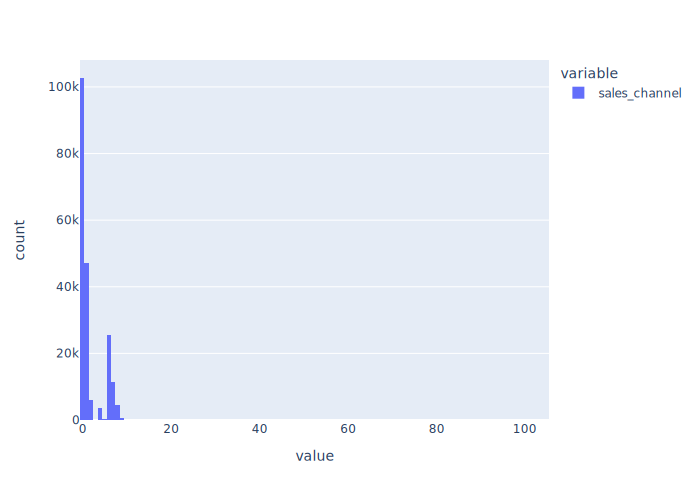

In [19]:
# plot a histogram
fig = px.histogram(orders_data.sales_channel)
fig.show('svg')

Channels 0, 1 and 6 are the best performing ones. Categorical.

### Column `seller_code`

In [20]:
# check `seller_code`
orders_data.seller_code.value_counts()

190    10678
177     9867
171     6978
3       6776
27      5821
       ...  
221        2
225        1
139        1
129        1
280        1
Name: seller_code, Length: 289, dtype: int64

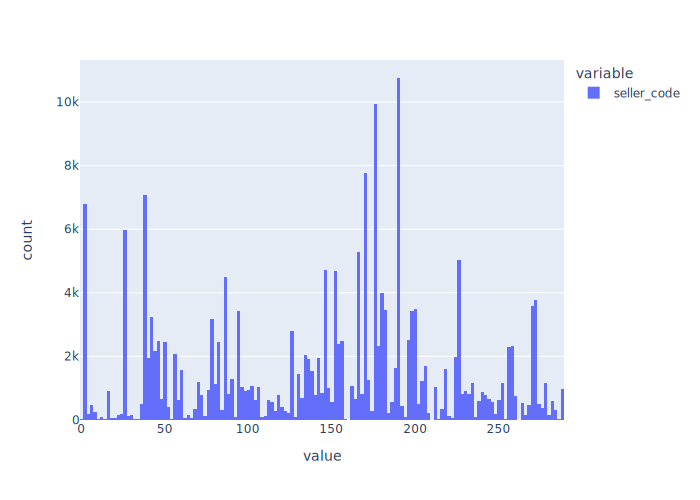

In [21]:
# plot a histogram
fig = px.histogram(orders_data.seller_code)
fig.show('svg')

A few sellers have outstanding performance. Other than that, they are pretty much standard.

Categorical.

### Column `register_date`

In [22]:
# check `register_date`
orders_data.register_date.value_counts()

2017-11-23T00:00:00Z    530
2018-02-28T00:00:00Z    449
2017-09-25T00:00:00Z    422
2017-08-24T00:00:00Z    406
2018-02-23T00:00:00Z    387
                       ... 
2013-12-27T00:00:00Z      1
2012-12-15T00:00:00Z      1
2013-12-24T00:00:00Z      1
2016-10-22T00:00:00Z      1
2008-03-29T00:00:00Z      1
Name: register_date, Length: 3118, dtype: int64

In [23]:
# check if all data have their 'time' part as 00:00:00, i.e., time is irrelevant
pd.to_datetime(orders_data.register_date).dt.time.value_counts()

00:00:00    201842
Name: register_date, dtype: int64

Once again, time is irrelevant, just like `last_purchase_data` from `churn_data`

In [24]:
# remove 'time' part of datetime
orders_data = orders_data.astype({'register_date': 'datetime64'})

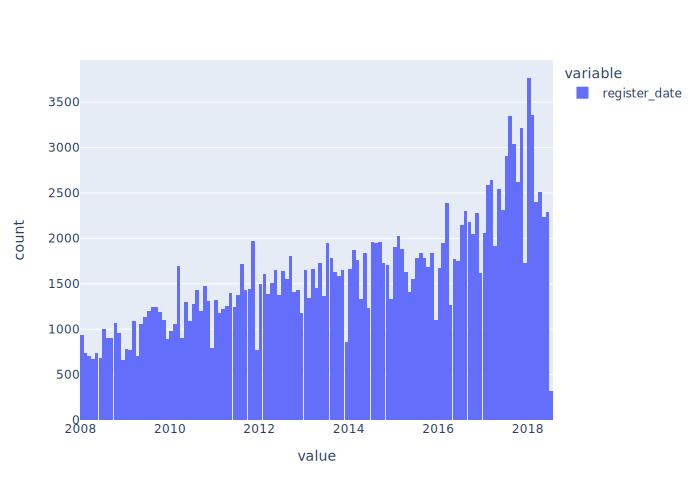

In [25]:
# plot a histogram
fig = px.histogram(orders_data.register_date)
fig.show('svg')

There is a clear tendency of an increase in orders. However, the last month (July 2018) is pretty low.

In [26]:
# check the date of the latest order
orders_data.register_date.max()

Timestamp('2018-07-08 00:00:00')

So the reason for that is now clear: the dataset only contains entries from July 1 to July 8.

### Column `total_price`

In [27]:
# check the range of `total_price`
orders_data.total_price.sort_values()

87165          0.01
87601          0.01
59948          0.01
32599          0.01
147709         0.01
            ...    
22327     428976.46
135548    428976.46
163817    428976.46
124675    428976.46
39825     428976.46
Name: total_price, Length: 201842, dtype: float64

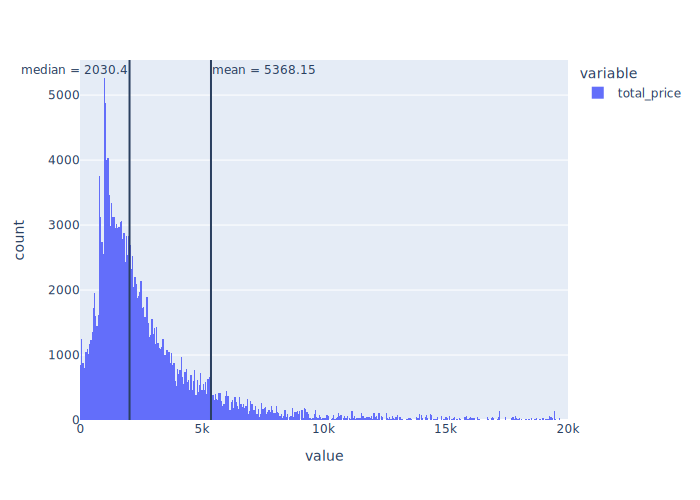

In [28]:
# plot a histogram for entries below 20000
fig = px.histogram(orders_data.query('total_price < 20E3').total_price)
# add mean and median vertical lines for the whole column
median = orders_data.total_price.median()
mean = orders_data.total_price.mean()
fig.add_vline(x=median, annotation_text=f'median = {round(median, 2)}', annotation_position='top left')
fig.add_vline(x=mean, annotation_text=f'mean = {round(mean, 2)}')
fig.update_xaxes({'range': [0, 20E3]})
fig.show('svg')

In [29]:
# group all orders and get their `total_price` (this value repeats itself for all instances of an order in `orders_data`)
grouped_orders = orders_data.groupby('order_id').first()   
# check the range of `total_price` (now order-wise instead of item-wise)
grouped_orders.total_price.sort_values()

order_id
2910          0.01
2909          0.01
4721          0.01
4719          0.01
2908          0.01
           ...    
16508    286607.34
17694    311741.10
18756    319660.21
14275    340398.70
16280    428976.46
Name: total_price, Length: 24319, dtype: float64

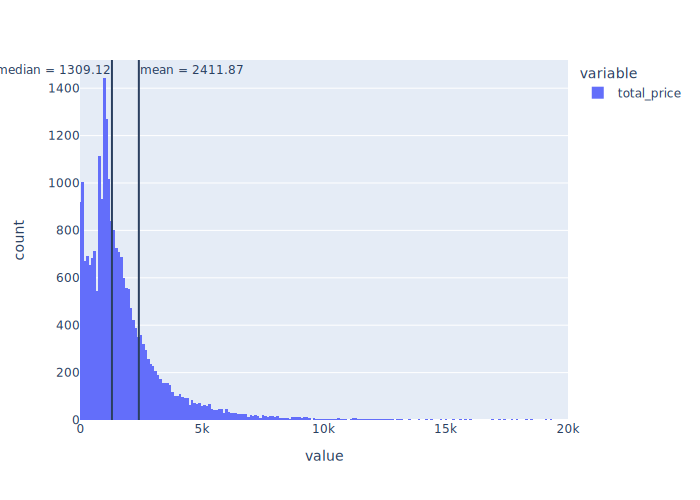

In [30]:
# plot a histogram (order-wise) for orders below 20k
fig = px.histogram(grouped_orders.query('total_price < 20E3').total_price)
# add mean and median vertical lines for the whole column
median = grouped_orders.total_price.median()
mean = grouped_orders.total_price.mean()
fig.add_vline(x=median, annotation_text=f'median = {round(median, 2)}', annotation_position='top left')
fig.add_vline(x=mean, annotation_text=f'mean = {round(mean, 2)}')
fig.update_xaxes({'range': [0, 20E3]})
fig.show('svg')

### Column `order_id`

In [31]:
#check `order_id`
orders_data.order_id.value_counts()

22012    138
17659     91
22248     87
19271     85
21985     83
        ... 
16754      1
8897       1
18021      1
8852       1
19452      1
Name: order_id, Length: 24319, dtype: int64

Unique order ID's: 24319

The Series above also hints at the number of different items purchased in each order.

Due to the high number of different orders, there is no point in plotting a histogram, since the data would all be merged into bins.

Categorical.

### Column `quantity`

In [32]:
#check the range of `quantity`
orders_data.quantity.sort_values()

87789        1
173625       1
173627       1
58689        1
173630       1
          ... 
41670     3500
100095    4500
147908    4800
62386     5500
19006     7000
Name: quantity, Length: 201842, dtype: int64

Good! No `quantity` <= 0

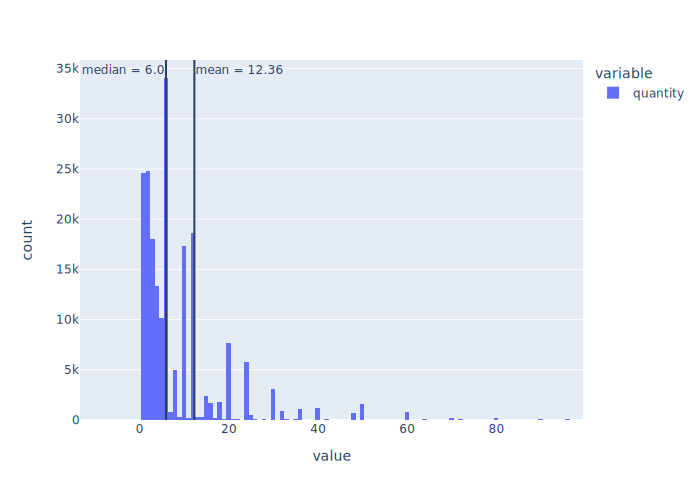

In [33]:
# plot a histogram of the frequency which an item is purchased (below 100 quantities)
# ATTENTION: this is not the same as the frequency of TOTAL number of items in each order
fig = px.histogram(orders_data.query('quantity < 100').quantity)
# add mean and median vertical lines for the whole column
median = orders_data.quantity.median()
mean = orders_data.quantity.mean()
fig.add_vline(x=median, annotation_text=f'median = {round(median, 2)}', annotation_position='top left')
fig.add_vline(x=mean, annotation_text=f'mean = {round(mean, 2)}')
fig.show('svg')

In [34]:
# check the median of items INDIVIDUALLY
orders_data.quantity.median()

6.0

Half the items are purchased up to 6 times in a single order.

In [35]:
# check the median of items per ORDER
grouped_orders.quantity.median()

6.0

Half the orders have up to 6 items in total.

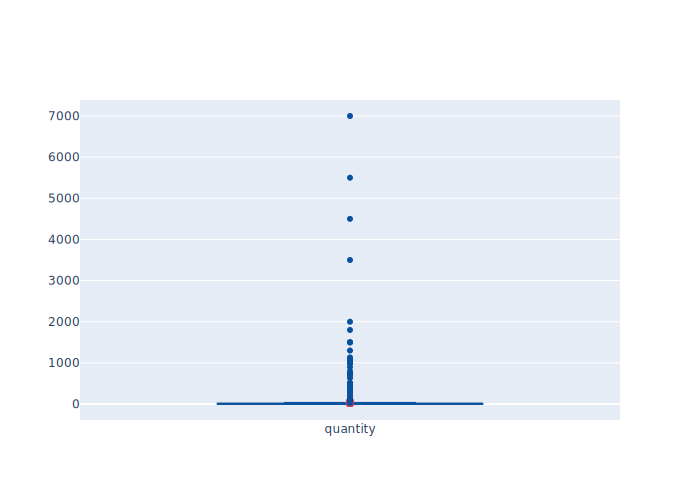

In [36]:
# plot box plot order-wise
fig = go.Figure()
fig.add_trace(go.Box(
    y=grouped_orders.quantity,
    name="quantity",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.show('svg')   # unfortunately Github's notebook does not render interactive Plotly graphs

Orders with 28 - 41 items might be outliers. Orders with 42 or more items are outliers (there's not enough info on data that suggests some of these outliers are not valid entries).

### Column `item_code`

In [37]:
# check the range of `item_code`
orders_data.item_code.sort_values()

116790       0
156059       0
188441       0
81529        0
177432       0
          ... 
158514    2980
62664     2980
73013     2980
185221    2980
27115     2980
Name: item_code, Length: 201842, dtype: int64

Min is 0 and max is 2980. Categorical feature.

In [38]:
# check the number of unique item codes
orders_data.item_code.nunique()

2968

Therefore item codes are not linear from 0 to 2980.

### Column `item_total_price`

In [39]:
#check the range of `item_total_price`
orders_data.item_total_price.sort_values()

152044         0.00
160101         0.01
154164         0.01
87165          0.01
32599          0.01
            ...    
114297     61712.00
147908     62160.00
111599     77275.20
62386      80890.15
19006     102951.11
Name: item_total_price, Length: 201842, dtype: float64

In [40]:
# check the observation where `item_total_price` == 0
orders_data.query('item_total_price == 0')

customer_code  sales_channel  seller_code register_date  total_price  \
152044            250              0          250    2018-06-04        41.93   

        order_id  quantity  item_code  item_total_price  unit_price  \
152044     24222         1       1639               0.0      477.17   

        group_code  segment_code  
152044           2             2

The documentation of the data says:
> item_total_price: total price of items, i.e., quantity * price;

Which is not the case here. This raises the question: are there any other cases where `item_total_price` != `price` * `quantity`?

In [41]:
# create a column `check_price` with boolean values if `item_total_price` != `price` * `quantity`
orders_data['check_price'] = (orders_data['quantity'] * orders_data['unit_price'] == orders_data['item_total_price'])

# check the number of each boolean
orders_data['check_price'].value_counts()

False    129330
True      72512
Name: check_price, dtype: int64

In [42]:
# print some of them
orders_data.query("check_price == False")

customer_code  sales_channel  seller_code register_date  total_price  \
0                 347              0          106    2018-01-22      2868.41   
1                 326              1          170    2011-01-29      4330.89   
6                 609              1          227    2011-10-19      1628.91   
7                 519              8          153    2008-07-06      1505.65   
8                  17              0          272    2015-05-27      1833.71   
...               ...            ...          ...           ...          ...   
204419            675              1          189    2009-03-09      1882.06   
204422            716              0          183    2016-02-29      2628.23   
204424            112              0           85    2015-12-03      6237.76   
204426            450              0           78    2014-12-02      4770.52   
204427            165              0          137    2017-12-04      1752.72   

        order_id  quantity  item_code  item_total_price  unit_price  \
0          22589         2       1608            170.55       72.90   
1           4897         3        373            211.60       64.12   
6           6391        12        282            190.98       13.76   
7            643         6        652             98.61       12.52   
8          14618        10       1767            581.31       49.12   
...          ...       ...        ...               ...         ...   
204419      1582        12       2843            112.64        8.94   
204422     16342         6        416             99.90       14.62   
204424     15848        12        635           1375.47      114.62   
204426     13587         2       1104            186.44       91.63   
204427     22102         5       1964             89.13       17.22   

        group_code  segment_code  check_price  
0                0             0        False  
1                0             0        False  
6                0             0        False  
7                0             0        False  
8                0             0        False  
...            ...           ...          ...  
204419           0             0        False  
204422           0             0        False  
204424           2             2        False  
204426           0             0        False  
204427           0             4        False  

[129330 rows x 13 columns]

This is ***probably*** because of discounts on purchases, which were not accounted for in the dataset.

To clear this up, one should talk to the data engineer and check whether these are really discounts or wrong data.

For this case, I am going to assume that these are discounts and no further action is needed.

In [43]:
# drop the `check_price` column, since it is no longer needed
orders_data.drop(columns=['check_price'], inplace=True)

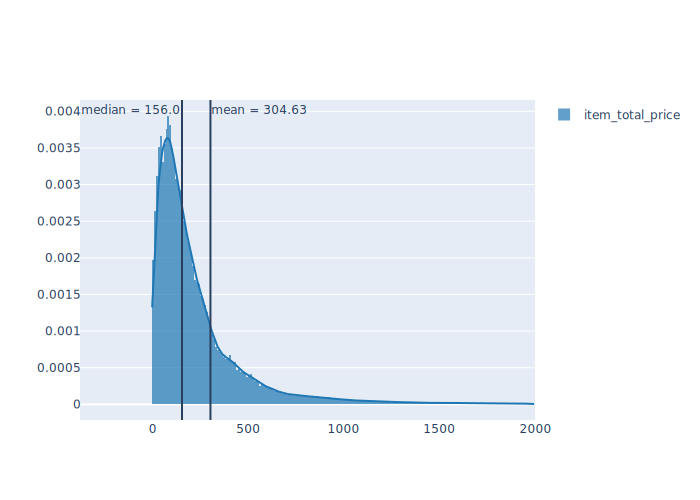

In [44]:
#plot kde of `item_total_price` below 2000 for better visualization
data = [orders_data.query('item_total_price < 2000').item_total_price.values]
# get mean and median of the whole column
median = orders_data.item_total_price.median()
mean = orders_data.item_total_price.mean()

# create distplot
fig = ff.create_distplot(data, group_labels=['item_total_price'], bin_size=10, show_rug=False)

# add vertical lines for mean and median
fig.add_vline(x=median, annotation_text=f'median = {median}', annotation_position='top left')
fig.add_vline(x=mean, annotation_text=f'mean = {round(mean, 2)}')
fig.show('svg')

Half the total price of all items does not exceed 156 monetary units.

In [45]:
# plot a box plot highlighting all suspected outliers
fig = go.Figure()
fig.add_trace(go.Box(
    y=orders_data.item_total_price,
    name="item_total_price",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))
fig.show('svg')

Total item prices between 615 and 936 are considered outliers, but, in fact, this box plot doesn't add too much information in the analysis.

Like mentioned before, this column is nothing but the multiplication of other two columns. It is better to detect and treat the outliers in those columns than in this one.

### Column `unit_price`

In [46]:
#check the range of `unit_price`
orders_data.unit_price.sort_values()

162591        0.01
106244        0.01
204075        0.01
133868        0.01
33182         0.01
            ...   
29892     14625.60
43181     15955.00
113561    21500.00
34248     26280.00
2841      26280.00
Name: unit_price, Length: 201842, dtype: float64

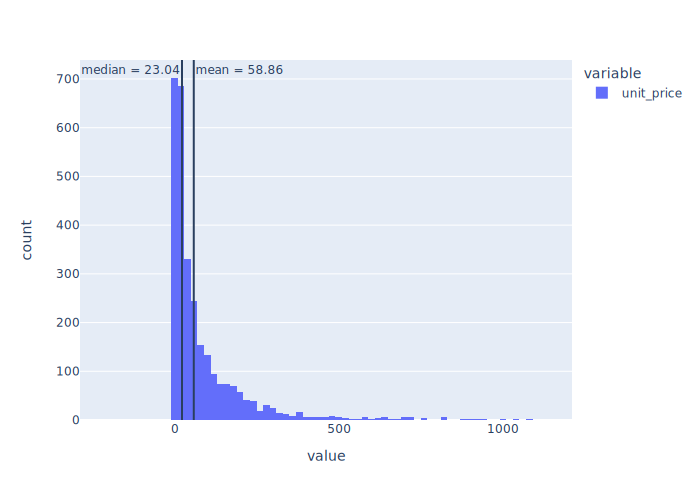

In [47]:
# group `orders_data` by items, so that repeated entries do not inflate the histogram
grouped_items = orders_data.groupby('item_code').first()
# plot a histogram of unit prices below 1200
fig = px.histogram(grouped_items.query('unit_price < 1200').unit_price)
# add mean and median vertical lines for the whole column
median = grouped_orders.unit_price.median()
mean = grouped_orders.unit_price.mean()
fig.add_vline(x=median, annotation_text=f'median = {round(median, 2)}', annotation_position='top left')
fig.add_vline(x=mean, annotation_text=f'mean = {round(mean, 2)}')
fig.show('svg')

Most items are cheaper than 100 monetary units.

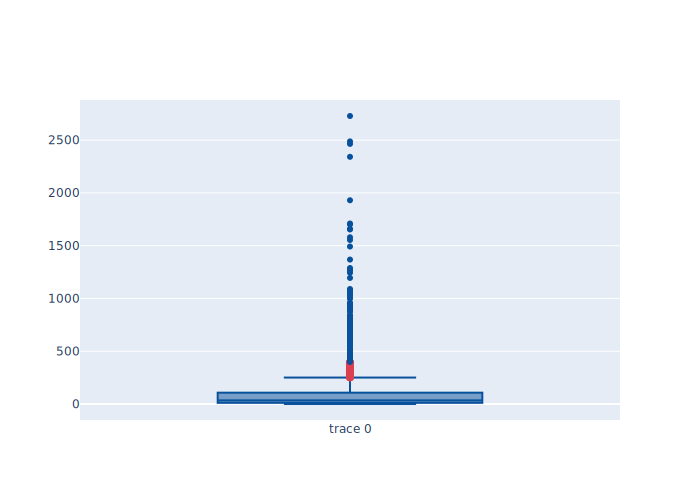

In [48]:
# plot a box plot highlighting all suspected outliers
fig = go.Figure()
fig.add_trace(go.Box(
    y=grouped_items.unit_price,
    #name="Suspected Outliers",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))
fig.show('svg')

Statistically speaking, item prices from 250 to 395 are suspected outliers, while prices above 395 are outliers.

However, more info on data is needed, since it is impossible to say that these items over 395 monetary units are not valid.

Outliers can never be blindly removed.

### Column `group_code`

In [49]:
#check `group_code`
orders_data.group_code.value_counts()

0    169493
2     24703
1      7646
Name: group_code, dtype: int64

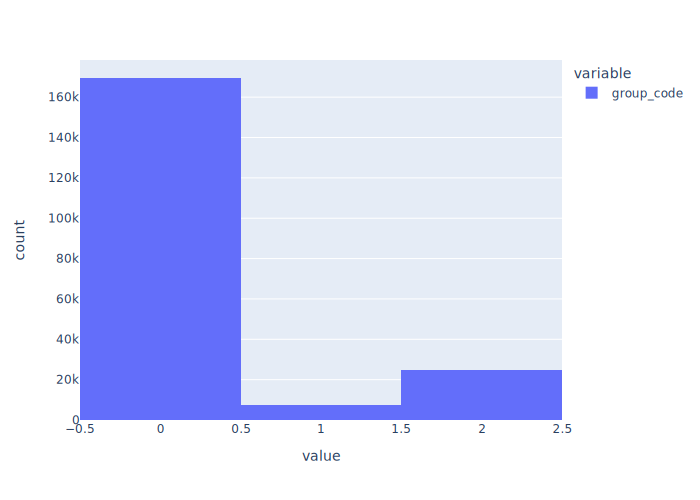

In [50]:
fig = px.histogram(orders_data.group_code)
fig.show('svg')

Categorical.

### Column `segment_code`

In [51]:
#check `segment_code`
orders_data.segment_code.value_counts()

0    149702
2     24703
5     10566
3      7824
4      4878
1      2276
6      1893
Name: segment_code, dtype: int64

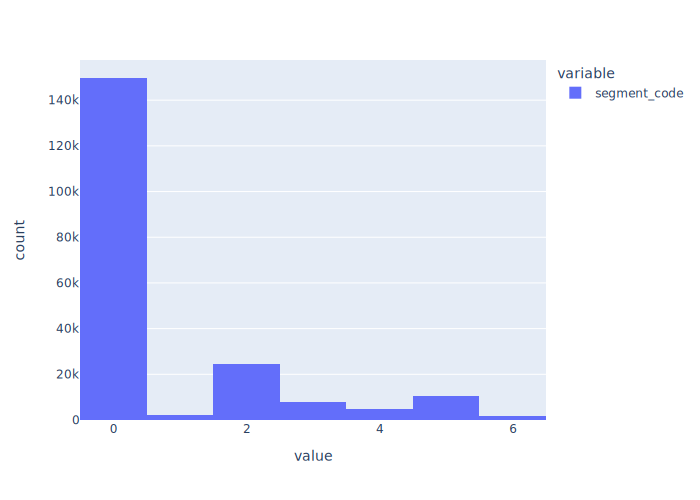

In [52]:
fig = px.histogram(orders_data.segment_code)
fig.show('svg')

Categorical.

___
**Suggestion**:

A deeper analysis could have been carried out. For now, this will do.